In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
df=pd.read_excel('Online retail.xlsx',header=None)
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [37]:
df.shape

(7501, 1)

In [39]:
df1=df[0].str.split(',', expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [63]:
grocery_items = set()
for col in df1.columns:
    grocery_items.update(df1[col].unique())

output_list = list()
for _, row in df1.iterrows():
    row_val = {item: 0 for item in grocery_items}
    row_val.update({item: 1 for item in row if pd.notna(item)})
    output_list.append(row_val)

df2 = pd.DataFrame(output_list)

grocery.head()

,grated cheese,extra dark chocolate,green beans,whole wheat pasta,pancakes,spinach,melons,mayonnaise,gums,muffins,...,None,herb & pepper,low fat yogurt,cream,french wine,light cream,shrimp,mashed potato,bug spray,almonds
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
sum(df2.sum())

29358

<AxesSubplot:>

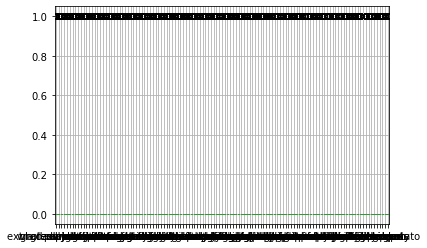

In [65]:
df2.boxplot()

In [66]:
df2['mineral water'].value_counts()



0    5713
1    1788
Name: mineral water, dtype: int64

In [67]:
df2['eggs'].value_counts()

0    6153
1    1348
Name: eggs, dtype: int64

In [68]:
df2.value_counts(ascending=True).head(5)

grated cheese  extra dark chocolate  green beans  whole wheat pasta  pancakes  spinach  melons  mayonnaise  gums  muffins  ham  cake  yogurt cake  oil  barbecue sauce  strawberries  brownies  oatmeal  green tea  asparagus  honey  protein bar  clothes accessories  whole weat flour  blueberries  spaghetti  butter  nonfat milk  fromage blanc  strong cheese  tea  cooking oil  chutney  frozen smoothie  chili  eggs  yams  avocado  turkey  bramble  salt  red wine  tomato sauce  white wine  babies food  carrots  magazines  vegetables mix  mint  burger sauce  salmon  hot dogs  hand protein bar  toothpaste  candy bars  soup  corn  energy bar  chocolate bread  ketchup  cauliflower  chicken  cereals  burgers  green grapes  mineral water  eggplant  french fries  flax seed  body spray  soda  energy drink  light mayo  ground beef  chocolate  olive oil  champagne  fresh bread  escalope  mint green tea  dessert wine  gluten free bar  sparkling water  black tea  cookies  pickles  tomatoes  rice  pepper 

In [69]:
total_items = sum(df2.sum())
print("Total Item :")
print()
item_summary = df2.sum().sort_values().reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head(15))
     

Total Item :

Item Summary:
          item_name  item_count
0              None           0
1         asparagus           1
2       water spray           3
3           napkins           5
4             cream           7
5           bramble          14
6               tea          29
7     mashed potato          31
8           chutney          31
9   chocolate bread          32
10     dessert wine          33
11          oatmeal          33
12          ketchup          33
13      babies food          34
14         sandwich          34


C:\Users\Indranil Joshi\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


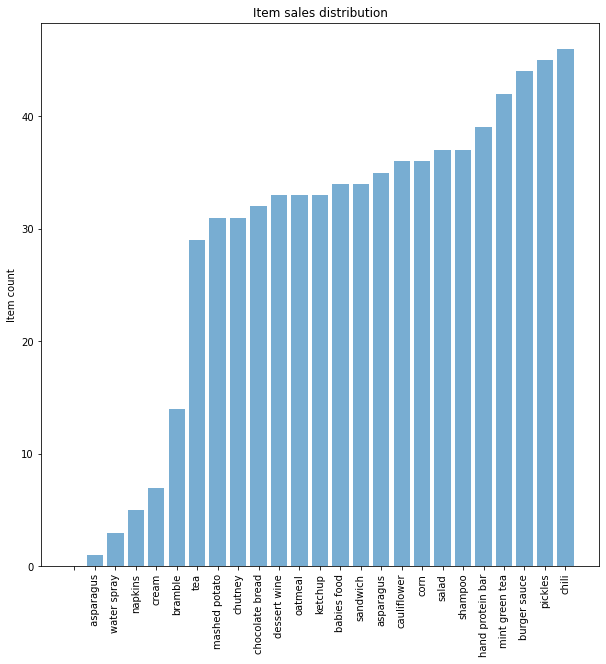

In [70]:
objects = (list(item_summary['item_name'].head(n=25)))
x = np.arange(len(objects))
y = list(item_summary['item_count'].head(n=25))

plt.figure(figsize=(10,10))
plt.bar(x,y, align='center', alpha=0.6)
plt.xticks(x,objects,rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2460: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  h = 2 * stats.iqr(a) / (len(a) ** (1 / 3))


<AxesSubplot:xlabel='mineral water', ylabel='Density'>

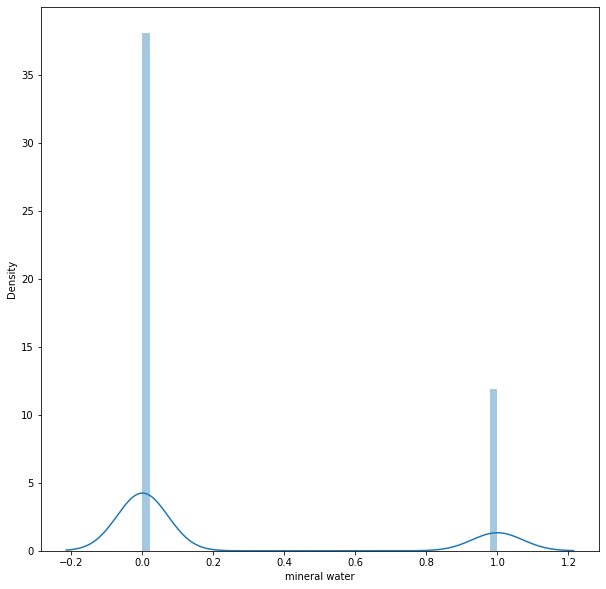

In [71]:
plt.figure(figsize=(10,10))
sns.distplot(df2['mineral water'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2460: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  h = 2 * stats.iqr(a) / (len(a) ** (1 / 3))


<AxesSubplot:xlabel='eggs', ylabel='Density'>

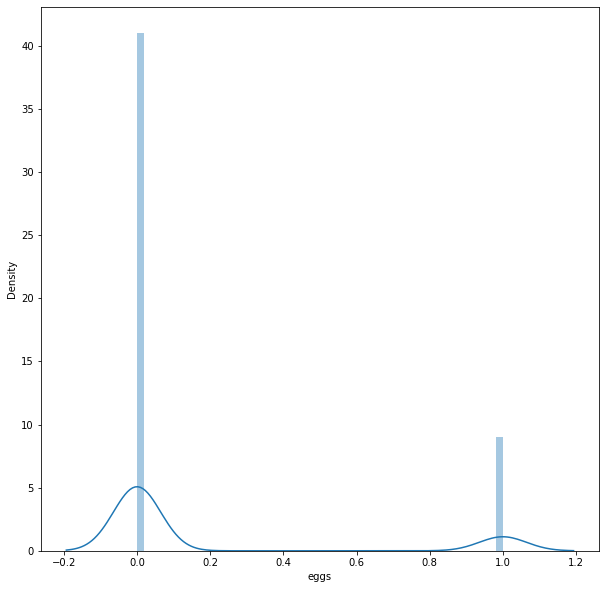

In [72]:
plt.figure(figsize=(10,10))
sns.distplot(df2['eggs'])

<AxesSubplot:xlabel='mineral water', ylabel='Count'>

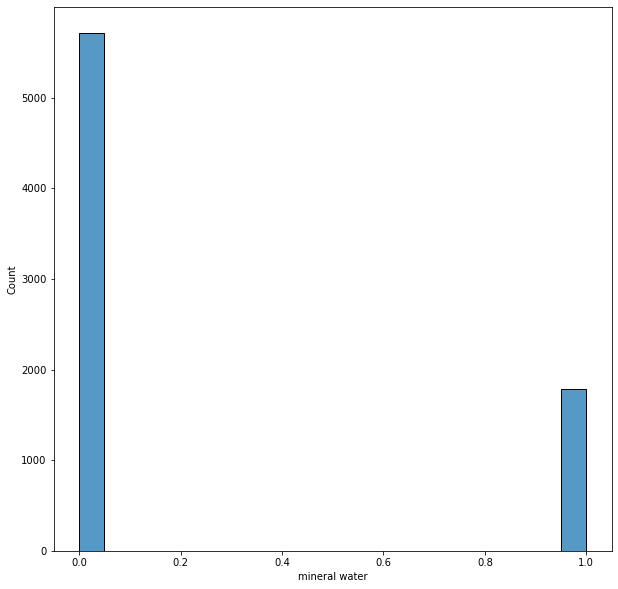

In [78]:
plt.figure(figsize=(10,10))
sns.histplot(df2['mineral water'],bins=20)

<AxesSubplot:xlabel='eggs', ylabel='Count'>

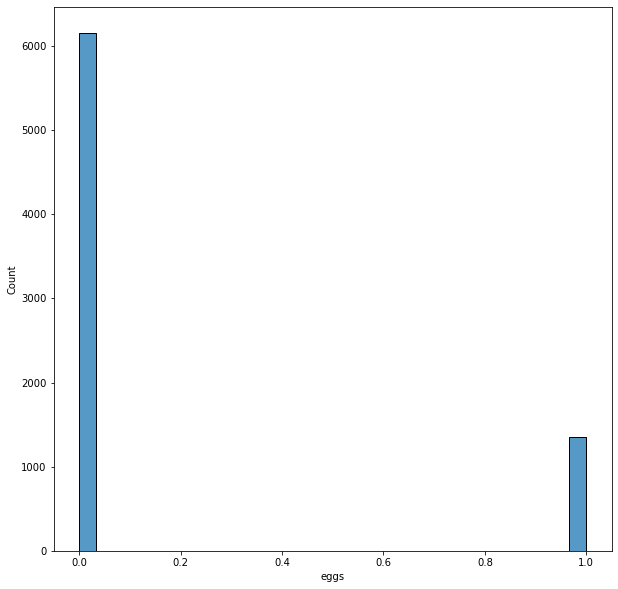

In [80]:
plt.figure(figsize=(10,10))
sns.histplot(df2['eggs'],bins=30)

<AxesSubplot:>

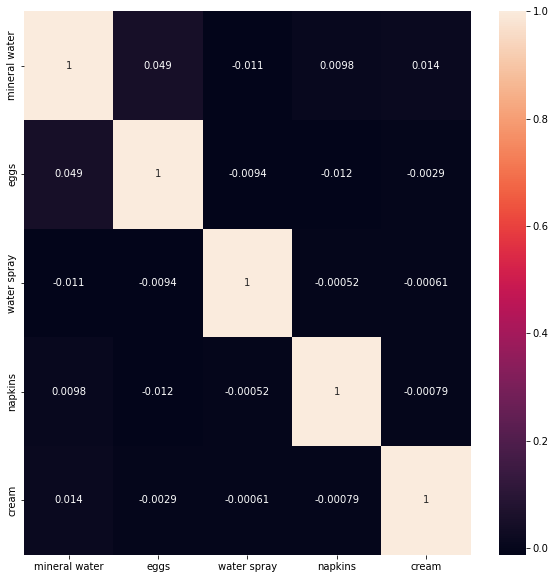

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(df2[['mineral water','eggs','water spray','napkins','cream']].corr(),annot=True)

In [96]:
frequent_patterns=apriori(df2,min_support=0.03,use_colnames=True)
frequent_patterns

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.052393,(grated cheese)
1,0.095054,(pancakes)
2,0.081056,(cake)
3,0.033729,(brownies)
4,0.132116,(green tea)
5,0.047460,(honey)
6,0.174110,(spaghetti)
7,0.030129,(butter)
8,0.051060,(cooking oil)
9,0.063325,(frozen smoothie)


In [100]:
association_rules(frequent_patterns,min_threshold=0.04,metric='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(pancakes),0.238368,0.095054,0.033729,0.141499,1.488616,0.011071,1.054100,0.430963
1,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712
2,(mineral water),(green tea),0.238368,0.132116,0.031063,0.130313,0.986357,-0.000430,0.997927,-0.017837
3,(green tea),(mineral water),0.132116,0.238368,0.031063,0.235116,0.986357,-0.000430,0.995748,-0.015688
4,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
5,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081,0.173666
6,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
7,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
8,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
9,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943


In [102]:
association_rules(frequent_patterns, min_threshold=0.05,metric='support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


In [103]:
association_rules(frequent_patterns, min_threshold=0.03, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(pancakes),0.238368,0.095054,0.033729,0.141499,1.488616,0.011071,1.054100,0.430963
1,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712
2,(mineral water),(green tea),0.238368,0.132116,0.031063,0.130313,0.986357,-0.000430,0.997927,-0.017837
3,(green tea),(mineral water),0.132116,0.238368,0.031063,0.235116,0.986357,-0.000430,0.995748,-0.015688
4,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
5,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081,0.173666
6,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
7,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
8,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
9,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
